In [5]:
import cv2

In [41]:
crack = cv2.imread('D:\\lizenan\\ground_crack_samples\\ground_crack_samples\\002.jpg')

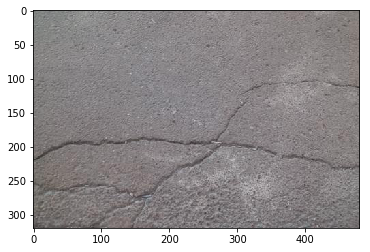

In [43]:
plt.imshow(crack)

In [44]:
gray = cv2.cvtColor(crack, cv2.COLOR_BGR2GRAY)

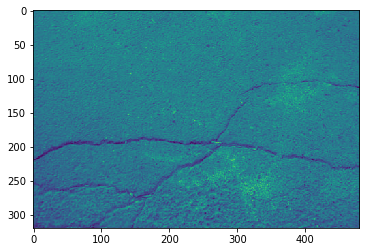

In [45]:
plt.imshow(gray)

In [170]:
dst = cv2.GaussianBlur(gray,(7,7),cv2.BORDER_DEFAULT)

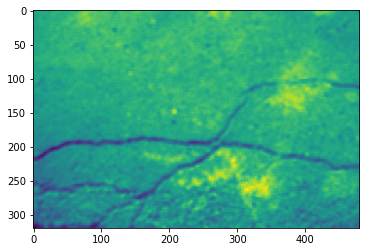

In [171]:
plt.imshow(dst)

In [56]:
dst.shape

(320, 480)

In [141]:
ret2,th2 = cv2.threshold(dst,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [142]:
th2

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

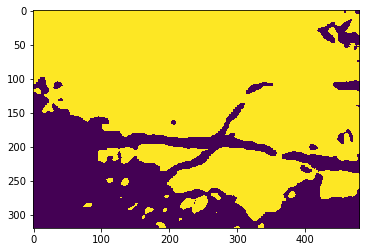

In [143]:
plt.imshow(th2)

In [76]:
edge = cv2.Canny(dst,0,60)

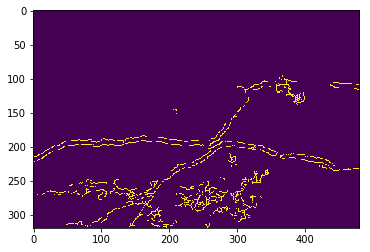

In [77]:
plt.imshow(edge)

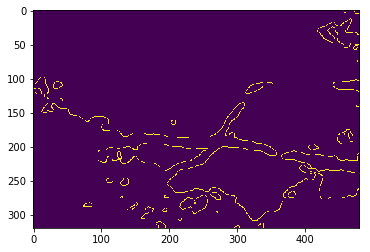

In [144]:
edge2 = cv2.Canny(th2,100,200)
plt.imshow(edge2)

In [119]:
ret3,th3 = cv2.threshold(edge,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

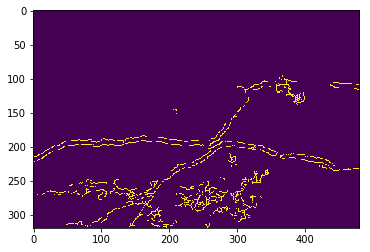

In [120]:
plt.imshow(th3)

In [145]:
ret4,th4 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

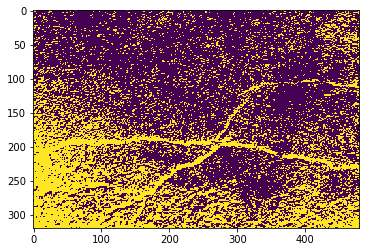

In [146]:
plt.imshow(th4)

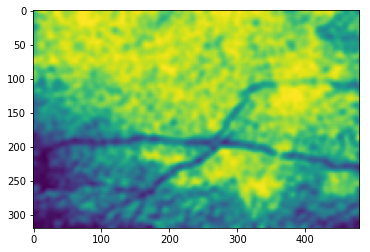

In [134]:
dst2= cv2.GaussianBlur(th4,(15,15),cv2.BORDER_DEFAULT)
plt.imshow(dst2)

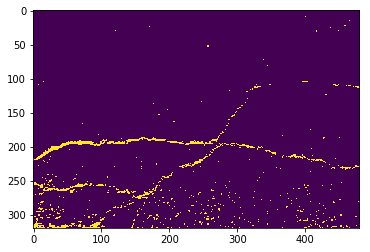

In [208]:
ret5,th5 = cv2.threshold(normalizedImg,60,255,cv2.THRESH_BINARY_INV)
plt.imshow(th5)

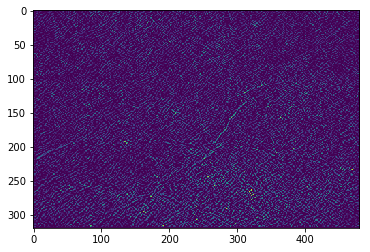

In [189]:
sobel = cv2.Sobel(normalizedImg, cv2.CV_8U, 1, 1)
plt.imshow(sobel)

In [186]:
normalizedImg = np.zeros((320, 480))
normalizedImg = cv2.normalize(gray,  normalizedImg, 0, 255, cv2.NORM_MINMAX)

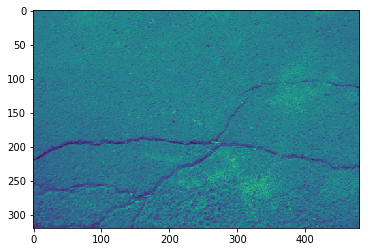

In [187]:
plt.imshow(normalizedImg)

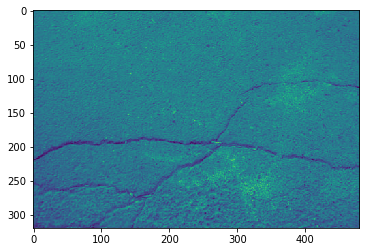

In [188]:
plt.imshow(gray)

In [213]:
p2,p93 = np.percentile(gray,(2,98))
img_rescale = ex.rescale_intensity(gray,in_range=(p2,p93))

In [211]:
from skimage import exposure as ex

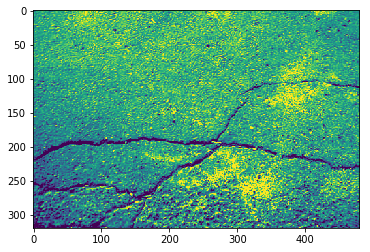

In [214]:
plt.imshow(img_rescale)

In [215]:
img_eq = ex.equalize_hist(gray)*255
img_eq = img_eq.astype("uint8")

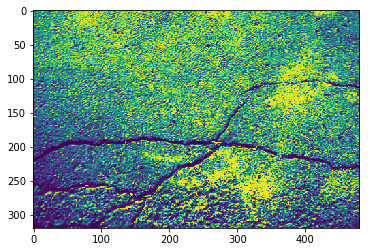

In [216]:
plt.imshow(img_eq)

In [240]:
img_ada = ex.equalize_adapthist(gray,clip_limit=0.03)*255
img_ada = img_ada.astype("uint8")

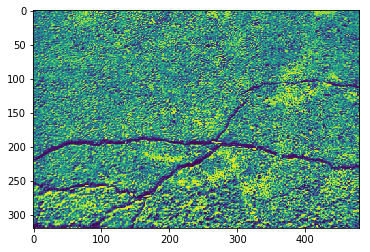

In [241]:
plt.imshow(img_ada)

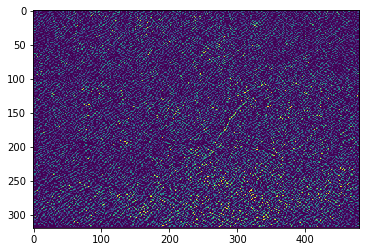

In [219]:
sobel = cv2.Sobel(img_rescale, cv2.CV_8U, 1, 1)
plt.imshow(sobel)

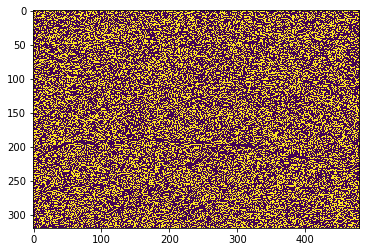

In [228]:
edge2 = cv2.Canny(img_ada,5,55)
plt.imshow(edge2)

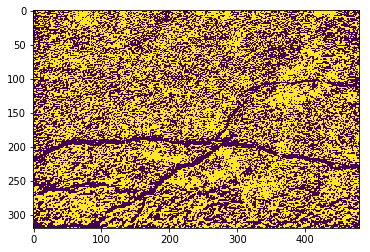

In [242]:
ret4,th4 = cv2.threshold(img_ada,0,255,cv2.THRESH_OTSU)
plt.imshow(th4)

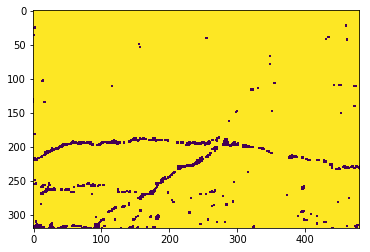

In [269]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (2,2))
dilation = cv2.dilate(th4, kernel2)
dilation = cv2.dilate(dilation, kernel3)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

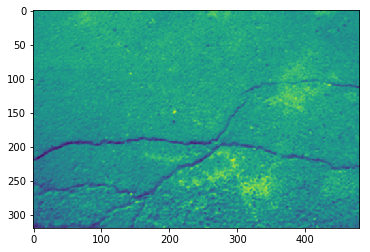

In [326]:
dst2= cv2.GaussianBlur(normalizedImg,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(dst2)

In [327]:
img_ada2 = ex.equalize_adapthist(dst2,clip_limit=0.03)*255
img_ada2 = img_ada2.astype("uint8")

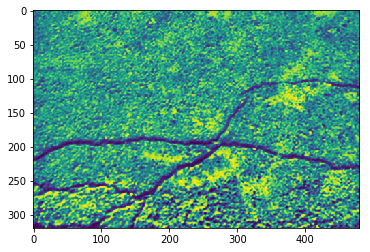

In [328]:
plt.imshow(img_ada2)

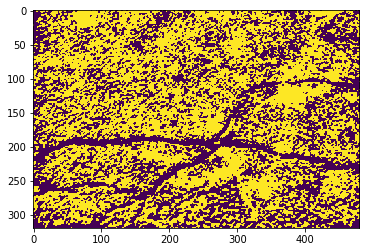

In [329]:
ret4,th4 = cv2.threshold(img_ada2,0,255,cv2.THRESH_OTSU)
plt.imshow(th4)

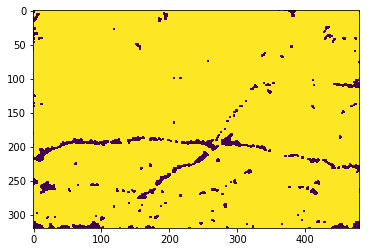

In [332]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
dilation = cv2.dilate(th4, kernel2)
dilation = cv2.dilate(dilation, kernel3)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

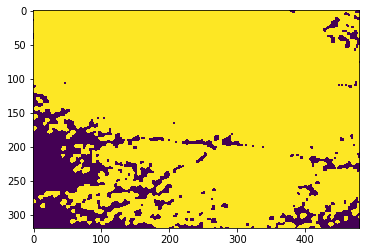

In [333]:
img_eq2 = ex.equalize_hist(dst2)*255
img_eq2= img_eq2.astype("uint8")
ret4,th4 = cv2.threshold(img_eq2,0,255,cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
dilation = cv2.dilate(th4, kernel2)
dilation = cv2.dilate(dilation, kernel3)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

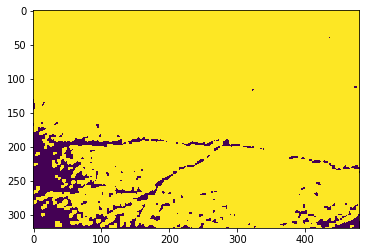

In [334]:
p2,p93 = np.percentile( ,(2,98))
img_rescale = ex.rescale_intensity(dst2,in_range=(p2,p93))
ret4,th4 = cv2.threshold(img_rescale,0,255,cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (2,2))
dilation = cv2.dilate(th4, kernel2)
dilation = cv2.dilate(dilation, kernel3)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

# final result

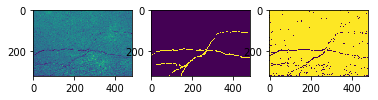

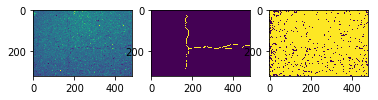

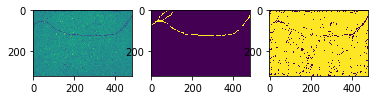

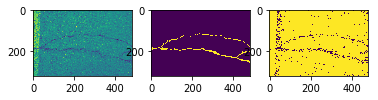

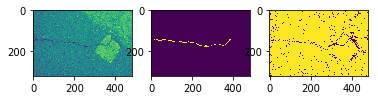

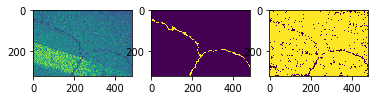

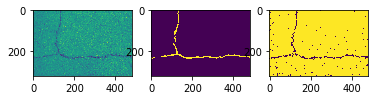

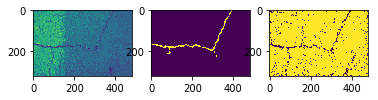

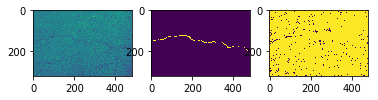

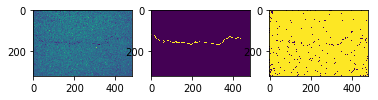

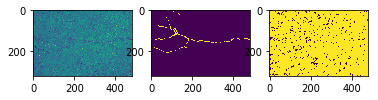

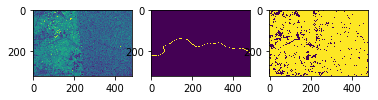

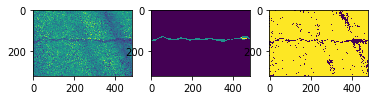

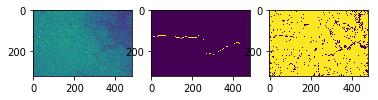

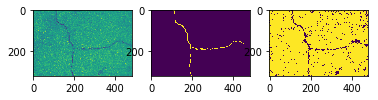

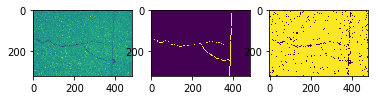

In [5]:
import os
import glob
import cv2
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from skimage import exposure as ex

pics = glob.glob("D:\lizenan\ground_crack_samples\ground_crack_samples\*")        #change here to the test file path
gts = glob.glob("D:\lizenan\ground_crack_samples\GT\*")                                               #change here to the test data ground true file path
for gt,pic in zip(gts,pics):
    gray = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)     #grayscale
    mat_contents = sio.loadmat(gt)
    seg_mask = mat_contents['groundTruth'][0][0][0]
    seg_mask = seg_mask -1
    normalizedImg = np.zeros((320, 480))
    normalizedImg = cv2.normalize(gray,  normalizedImg, 0, 255, cv2.NORM_MINMAX)    #min-max normalization
    img_ada2 = ex.equalize_adapthist(normalizedImg,clip_limit=0.03)*255             #equalize adapt
    img_ada2 = img_ada2.astype("uint8")
    ret4,th4 = cv2.threshold(img_ada2,0,255,cv2.THRESH_OTSU)                              #thresholding
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))                             #dilation
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (2,2))
        dilation = cv2.dilate(th4, kernel2)
    dilation = cv2.dilate(dilation, kernel3)
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)                       #closing
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(gray)
    plt.subplot(1,3,2)
    plt.imshow(seg_mask)
    plt.subplot(1,3,3)
    plt.imshow(closing)
    plt.show()